In [12]:
#데이터 세가지
## RDD (비구조적) :schema Free <immutable>
## DataFrame (구조적) : schema <immutable>
## Dataset

In [ ]:
#Driver 내 SparkSession
#SparkSession 내 SparkContext
#SparkContext 내 RDD

In [3]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

# RDD
## RDD의 두가지 처리 방법
- 변환(Transform) - lazy, action 없으면 안보여줌 
- 행동(Action)

## RDD 생성 방법
- 내부: 이미 만들어진 배열과 같이 읽어서 생성 , Parallelize() 함수사용
- 외부: 파일, 데이터 베이스등 외부에서 읽어와서 실행, TextFile() 함수사용

## RDD API
- Transformations- RDD로 반환<br>

함수 | 설명 | 예제
-------|-------|-------
```map(fn)``` | 요소별로 fn을 적용해서 결과 RDD 돌려줌 | ```.map(lambda x: x.split(' ')```
```filter(fn)``` | 요소별로 선별하여 fn을 적용해서 결과 RDD 돌려줌 | ```.filter(lambda x: "Spark" in x)```
```flatMap(fn)``` | 요소별로 fn을 적용하고, flat해서 결과 RDD 돌려줌 | ```.flatMap(lambda x: x.split(' '))```
```groupByKey()``` | key를 그룹해서 iterator를 돌려줌. |
<br>

- Action- list로 반환 <br> 

함수 | 설명 | 예제
-------|-------|-------
```reduce(fn)``` | 요소별로 fn을 사용해서 줄여서 결과 list를 돌려줌 | ```reduce(lambda x,y:x+y)```
```collect()``` | 모든 요소를 결과 list로 돌려줌 |
```count()``` | 요소의 갯수를 결과 list로 돌려줌 |
```take(n)``` | ```collect()```는 전체이지만, n개만 돌려줌 | ```take(1)```
```countByKey()``` | key별 갯수를 세는 함수 | ```countByKey().items()```
```foreach(fn)``` | 각 데이터 항목에 함수fn을 적용 |

In [8]:
# 1) 내부 생성방법
myList = [1,2,3,4,5] #type = <class 'list'>
myRdd1 = spark.sparkContext.parallelize(myList) #type = <class 'pyspark.rdd.RDD'>

In [9]:
# 2) 외부 생성방법
import os
myRdd2 = spark.sparkContext\
            .textFile(os.path.join("s-master/data","ds_spark_wiki.txt"))

In [11]:
# Action
print(myRdd1.take(3))
print(myRdd2.first())

[1, 2, 3]
Wikipedia


#### map() : map함수 사용하면 for 문 없이도 처리 가능
#### filter(): 데이터 선별

In [26]:
#python에서 map 함수
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    return(float(9)/5)*c +32
f = map(c2f, celsius) # <class 'map'>
print(list(f)) #list로 반환

[102.56, 97.7, 99.14, 100.03999999999999]


In [29]:
f_map = map(lambda c: (float(9)/5)*c +32, celsius)
f_list = list(map(lambda c: (float(9)/5)*c +32, celsius))

In [36]:
sentence = "Hello World" #class 'str'
sent=list(map(lambda x: x.split(), sentence))
sent

[['H'], ['e'], ['l'], ['l'], ['o'], [], ['W'], ['o'], ['r'], ['l'], ['d']]

In [39]:
sentence = ["Hello World", "Good Morining"] #class 'list'
list_sent=list(map(lambda x:x.split(), sentence))
list_sent

[['Hello', 'World'], ['Good', 'Morining']]

In [40]:
#filter()
fib=[0,1,1,2,3,5,8,13,21,34,55]
result = filter(lambda x: x%2, fib) #홀수만 출력한것임
print(list(result))

[1, 1, 3, 5, 13, 21, 55]


#### reduce()
- reduce() 역시 함수와 데이터 2개의 인자를 받음.
- 데이터에 대해 함수를 반복적으로 적용하여 결과 값을 만들게 된다.

In [41]:
from functools import reduce
reduce(lambda x, y: x + y, range(1,101))
#1부터 100까지 더한 결과가 나오게 됨 
#x를 부분합계, y을 1부터 증가함.

5050

In [ ]:
** 
y = list()
for i in x:
    y.append(int(i))
    
** 
y = [int(i) for i in x]

## spark 에서 RDD 사용

In [46]:
nRdd = spark.sparkContext.parallelize([1, 2, 3, 4])
squared = nRdd.map(lambda x: x*x)
#데이터.map(function)
print(squared)
print(type(squared))

PythonRDD[20] at RDD at PythonRDD.scala:53
<class 'pyspark.rdd.PipelinedRDD'>


In [47]:
# Map() 은 transformation 함수라서, 실제 값은 action 함수가 적용될 때까지 연기되어 계산된다.
##이렇게 메모리 연산을 하기 때문에 하둡보다 spark 가 더 빠른것
##map()함수의 반환값은 RDD 이다.
##즉, 반환값을 실제로 확인해볼라면, collect() 사용하여 출력해야한다.
print(squared.collect()) 
print(type(squared))
squared=squared.collect()
print(type(squared))

[1, 4, 9, 16]
<class 'pyspark.rdd.PipelinedRDD'>
<class 'list'>


In [50]:
import os
myRdd4 = spark.sparkContext\
    .textFile(os.path.join("s-master/data","ds_spark_2cols.csv"))

In [51]:
#csv에서 배열로
##위에서 csv 파일을 읽어서 아래와 같이 구성된 요소를 정수 리스트로 만들어보자
myRdd4.take(5)

['35, 2', '40, 27', '12, 38', '15, 31', '21, 1']

In [52]:
myRdd5 = myRdd4.map(lambda line: line.split(',')) #,로 split 하고 list 생성
myRdd5.take(5)

[['35', ' 2'], ['40', ' 27'], ['12', ' 38'], ['15', ' 31'], ['21', ' 1']]

In [54]:
myRdd6 = myRdd5.map(lambda x: [int(i) for i in x])
myRdd6.take(5)

[[35, 2], [40, 27], [12, 38], [15, 31], [21, 1]]

In [ ]:
lambda x: x.replace('a', 'AA')
lambda x: x.upper()
lambda x: x[0].upper() 등

In [55]:
myRdd100 = spark.sparkContext.parallelize(range(1,101))
myRdd100.reduce(lambda subtotal, x: subtotal+x)

5050

In [56]:
# 단순 통계 기능
# 텍스트 데이터와 달리 정량 데이터로부터 sum, min, max, 표준편차 등 서술 통계를 계산할 수 있다. 
print ("sum: ", myRdd100.sum())
print ("min: ", myRdd100.min())
print ("max: ", myRdd100.max())
print ("standard deviation:", myRdd100.stdev())
print ("variance: ", myRdd100.variance())

sum:  5050
min:  1
max:  100
standard deviation: 28.86607004772212
variance:  833.25


In [57]:
# filter()
myRdd_spark = myRdd2.filter(lambda line: "Spark" in line)
print("How many ines having 'Spark': ", myRdd_spark.count())
print(myRdd_spark.first())

How many ines having 'Spark':  4
Apache Spark is an open source cluster computing framework.


In [58]:
#한글을 filter 할려면앞에 u 를 붙여준다. u 는 유니코드를 의미
myRdd_unicode = myRdd2.filter(lambda line: u"스파크" in line)

print(myRdd_unicode.first())

아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.


##### filter() 사용하여 stopwords 제거

In [65]:
stopwords = ['is', 'am', 'are', 'the', 'for','a','an','at']
#filter 로 찾고 싶으면 "word" in line
#filter 로 없애고 싶으면 line not in ["words"]
#n차원을 1차원으로 :flatMap
myRdd_stop = myRdd2.flatMap(lambda x: x.split())\
                    .filter(lambda x: x not in stopwords)

for words in myRdd_stop.collect(): #출력해보기
    print(words, end=' ')

Wikipedia Apache Spark open source cluster computing framework. 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. Apache Spark Apache Spark Apache Spark Apache Spark 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 Originally developed University of California, Berkeley's AMPLab, Spark codebase was later donated to Apache Software Foundation, which has maintained it since. Spark provides interface programming entire clusters with implicit data parallelism and fault-tolerance. 

In [66]:
#foreach() : action 이지만 반환값이 없음
spark.sparkContext.parallelize([1,2,3,4,5]).foreach(lambda x: x+1)

In [67]:
spark.sparkContext.parallelize([1,2,3,4,5]).map(lambda x: x+1).collect()

[2, 3, 4, 5, 6]

In [69]:
def f(x): print(x)
spark.sparkContext.parallelize([1, 2, 3, 4, 5]).foreach(f)
#prompt에선 반환값이 보임: 바로바로 반환값이 보이는 곳

In [71]:
myList=["this is","a line"]
_rdd=spark.sparkContext.parallelize(myList)
wordsRdd=_rdd.map(lambda x:x.split())
print (wordsRdd.collect())

[['this', 'is'], ['a', 'line']]


### pipeline
spark 는 pipeline 형식으로 실행함<br>
파이프라인은 transformation, action 함수를 연이어 적용하는 방식을 뜻함<br>
하나씩끝내고 결과 받은 후 하는게 아니고 효율적인 처리를 위하여 파이프라인 같이 붙여서 중간결과를 산출하지 않고 연이어 처리

In [72]:
upper2list = wordsRdd.map(lambda x:[i.upper() for i in x]).collect()
print(type(upper2list))

<class 'list'>


In [73]:
wordsLength = wordsRdd\
    .map(len)\
    .collect()
print (wordsLength)
#단어의 수를 len() 함수로 세고 있음

[2, 2]


### 파일에 쓰기
RDD 저장, Spark 에서는 list는 RDD로 만들어 로컬 파일에 쓰게 됨

In [74]:
spark.sparkContext.parallelize(upper2list).saveAsTextFile("data/ds_spark_wiki_out")

In [75]:
!dir data\

 C 드라이브의 볼륨: Windows-SSD
 볼륨 일련 번호: C6A4-826F

 C:\Users\woojung\Desktop\AI_WORKS\02. SelfStudy\2. DL\BigData_실습\data 디렉터리

2020-10-19  오전 02:56    <DIR>          .
2020-10-19  오전 02:56    <DIR>          ..
2020-10-19  오전 02:56    <DIR>          ds_spark_wiki_out
               0개 파일                   0 바이트
               3개 디렉터리  54,929,940,480 바이트 남음


###  GroupBy  - unpaired RDD
키를 선택하여 사용할 수 있음 groupByKey() 와 비교하여 상대적으로 느림

In [77]:
myRdd_group=myRdd2.groupBy(lambda x:x[0:2]) #lambda가 key값을 뜻함

for (k,v) in myRdd_group.collect(): #key 값을 떼서 가지고 있겠다는 뜻임
    print ("{}: {}".format(k, v))
#key 는 예상 한대로 되었으나 value 는 iterator 로 생성되었다.

Wi: <pyspark.resultiterable.ResultIterable object at 0x0000012B643DCD08>
Ap: <pyspark.resultiterable.ResultIterable object at 0x0000012B643DC388>
아파: <pyspark.resultiterable.ResultIterable object at 0x0000012B64468BC8>
Or: <pyspark.resultiterable.ResultIterable object at 0x0000012B643E34C8>
th: <pyspark.resultiterable.ResultIterable object at 0x0000012B643E3548>
wh: <pyspark.resultiterable.ResultIterable object at 0x0000012B643BB148>
Sp: <pyspark.resultiterable.ResultIterable object at 0x0000012B643BB888>
im: <pyspark.resultiterable.ResultIterable object at 0x0000012B643E3C48>


In [78]:
#ResultIterable은 반복문으로 해체하여 결과를 출력하면 된다.

In [80]:
#myRdd_group=myRdd2.flatMap(lambda x:x.split()).groupBy(lambda x:w[0:2])
myRdd_group=myRdd2.groupBy(lambda x:x[0:2])

for (k,v) in myRdd_group.collect():
    for eachValue in v:
        print ("{}: {}".format(k, eachValue))
    #print ("-----")

Wi: Wikipedia
Ap: Apache Spark is an open source cluster computing framework.
Ap: Apache Spark Apache Spark Apache Spark Apache Spark
아파: 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
아파: 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Or: Originally developed at the University of California, Berkeley's AMPLab,
th: the Spark codebase was later donated to the Apache Software Foundation,
wh: which has maintained it since.
Sp: Spark provides an interface for programming entire clusters with
im: implicit data parallelism and fault-tolerance.


In [83]:
_testList=[("Seoul",1),("Seoul",1),("Seoul",1),("Busan",1),("Busan",1),
           ("Seoul",1),("Busan",1),
           ("Seoul",1),("Seoul",1),("Busan",1),("Busan",1)]
_testRdd = spark.sparkContext.parallelize(_testList)
_testRdd.groupBy(lambda x:x[0]).collect()

[('Seoul', <pyspark.resultiterable.ResultIterable at 0x12b64459848>),
 ('Busan', <pyspark.resultiterable.ResultIterable at 0x12b643910c8>)]

In [84]:
_testRdd.groupBy(lambda x: x[0]).mapValues(lambda x: list(x)).collect()

[('Seoul',
  [('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1),
   ('Seoul', 1)]),
 ('Busan',
  [('Busan', 1), ('Busan', 1), ('Busan', 1), ('Busan', 1), ('Busan', 1)])]

### Pair RDD -  paired RDD

구분 | 설명
-----|-----
byKey | 동일한 키에 대해 연산<br>- 단계 1: key-value를 계산한다. 각 key의 빈도를 계산  '(key,1)'<br>- 단계 2: byKey를 적용한다. 동일한 key의 value를 더해준다.
byValue | 예, mapValues()


구분 | 설명
-----|-----
groupByKey() | 같은 key를 grouping, 부분partition에서 **먼저 reduce하지 않고, 전체로 계산**한다.
reduceByKey() | 같은 key의 value를 합계, 부분partition에서 **먼저 reduce하고, 전체로 계산**한다. <br>grouping + aggregation. 즉 **reduceByKey = groupByKey().reduce()**
combineByKey() | 키별로 합계및 갯수 (key, (sum, count)) **평균 구할때**
aggregateByKey() | reduceByKey()와 유사하지만 결과를 다른 형식으로 반환. For example (1,2),(1,4) as input and (1,"six") as output
mapValues() | PairRDD는 key,value가 있기 마련이다. value에 대해 적용하는 함수이다. 즉 key가 아니라 **value에 적용하는 함수**이다.

In [85]:
# Partition
_testRdd.getNumPartitions()
#데이터를 분할해서 클러스터의 노드에 배분된 논리적인 데이터 조각을 말한다. 
#현재 partition은 1개이다.

1

In [86]:
# 'f'를 사용하면 변수를 그대로 출력할 수 있다.
year = 2020
name = 'jsl'
f"Hello, {name} {year}."

'Hello, jsl 2020.'

In [96]:
partitions = _testRdd.glom().collect() #partition 세는 방법
for num, partition in enumerate(partitions):
    print(f'Partitions {num} -> {partition}')
print("===========================")
# 파티션 하나이니까 하나에 모든 데이터가 들어가 있게 된다
print(partitions)

Partitions 0 -> [('Seoul', 1), ('Seoul', 1), ('Seoul', 1), ('Busan', 1), ('Busan', 1), ('Seoul', 1), ('Busan', 1), ('Seoul', 1), ('Seoul', 1), ('Busan', 1), ('Busan', 1)]
[[('Seoul', 1), ('Seoul', 1), ('Seoul', 1), ('Busan', 1), ('Busan', 1), ('Seoul', 1), ('Busan', 1), ('Seoul', 1), ('Seoul', 1), ('Busan', 1), ('Busan', 1)]]


In [104]:
_testRdd.groupBy(lambda x:x[0]).mapValues(list).values().collect()

[[('Seoul', 1),
  ('Seoul', 1),
  ('Seoul', 1),
  ('Seoul', 1),
  ('Seoul', 1),
  ('Seoul', 1)],
 [('Busan', 1), ('Busan', 1), ('Busan', 1), ('Busan', 1), ('Busan', 1)]]

In [107]:
_testRdd.groupByKey().mapValues(list).values().collect()

[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]

### reduceByKey()

In [97]:
#파티션별로 연산을 하게 된다
#동일한 key 에 대해 value 을 합계하게 된다.
#reduceByKey 는 partition 별로 작업을 먼저 수행한다.
_testRdd.reduceByKey(lambda x,y:x+y).collect()

[('Seoul', 6), ('Busan', 5)]

In [109]:
# mapValues(sum)을 하면 key 별로 합계를 구할 수 있음 :sum(value)
#def f(x): return len(x) len도가능
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .mapValues(sum)\
    .take(5)

[('Wikipedia', 1), ('Apache', 6), ('Spark', 7), ('is', 1), ('an', 2)]

In [112]:
wc=myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .take(10)

In [113]:
for e in wc:
    k = e[0]
    v = e[1]
    print (f"단어:{k}\t\t빈도:{v}")

단어:Wikipedia		빈도:1
단어:Apache		빈도:6
단어:Spark		빈도:7
단어:is		빈도:1
단어:an		빈도:2
단어:open		빈도:1
단어:source		빈도:1
단어:cluster		빈도:1
단어:computing		빈도:1
단어:framework.		빈도:1


In [118]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .countByKey() #.items() to be added to get a list
## dictionary 형태, value -> int 라는 뜻

defaultdict(int,
            {'Wikipedia': 1,
             'Apache': 6,
             'Spark': 7,
             'is': 1,
             'an': 2,
             'open': 1,
             'source': 1,
             'cluster': 1,
             'computing': 1,
             'framework.': 1,
             '아파치': 5,
             '스파크는': 1,
             '오픈': 1,
             '소스': 1,
             '클러스터': 1,
             '컴퓨팅': 1,
             '프레임워크이다.': 1,
             '스파크': 4,
             'Originally': 1,
             'developed': 1,
             'at': 1,
             'the': 3,
             'University': 1,
             'of': 1,
             'California,': 1,
             "Berkeley's": 1,
             'AMPLab,': 1,
             'codebase': 1,
             'was': 1,
             'later': 1,
             'donated': 1,
             'to': 1,
             'Software': 1,
             'Foundation,': 1,
             'which': 1,
             'has': 1,
             'maintained': 1,
             'it': 1,
      

### CombineByKey
#### 키별로 합계 및 갯수 (key, (sum, count)) 을 계산
combiner = 각 키에 대해 (value, 1) 튜플 만든다
<br>
merge values = 값을 더해나감 (sum, count) 즉, sum+value, count+1
<br>
merge combiner = partition 별로 combiner 을 더함

In [119]:
#데이터 생성
_testList=[("key1",1),("key1",3),("key2",2),("key1",2),("key2",4),
           ("key1",5),("key2",6),
           ("key1",7),("key1",8),("key2",9),("key2",3)]

In [120]:
#partition 이 1개이면 combiner, mergeValues 만 작동함
###RDD 생성
_testRdd=spark.sparkContext.parallelize(_testList)

### 현재 parition 의 갯수
_testRdd.getNumPartitions()

1

In [121]:
#partition 이 1개이면, 키별로 값을 더해간다.
#키가 존재하지 않으면 combiner()를, 존재하면 mergeValues()가 실행

#combine, value, 첫번째꺼의 combine 을 더하는 것임
#combiner, merge value, merge combiner
_testRdd.combineByKey(lambda v : str(v)+"*", lambda c, v : c+"#"+str(v), lambda c1, c2 : c1+'&'+c2).collect()

#partition이 하나임으로 mergecombiner 가 실행되지 않음

[('key1', '1*#3#2#5#7#8'), ('key2', '2*#4#6#9#3')]

In [123]:
_testRdd = spark.sparkContext.parallelize(_testList, 2)
#partitions을 두개로 해준다
### 현재 parition 의 갯수
_testRdd.getNumPartitions()

2

In [124]:
partitions = _testRdd.glom().collect()
for num, partition in enumerate(partitions):
    print(f'Partitions {num} -> {partition}')

Partitions 0 -> [('key1', 1), ('key1', 3), ('key2', 2), ('key1', 2), ('key2', 4)]
Partitions 1 -> [('key1', 5), ('key2', 6), ('key1', 7), ('key1', 8), ('key2', 9), ('key2', 3)]


In [125]:
_testRdd.combineByKey(lambda v : str(v)+"*", lambda c, v : c+"#"+str(v), lambda c1, c2 : c1+'&'+c2).collect()

[('key1', '1*#3#2&5*#7#8'), ('key2', '2*#4&6*#9#3')]

In [126]:
_testRdd.combineByKey(lambda value:(value,1),
                     lambda x, value : (x[0]+value, x[1]+1),
                     lambda x,y: (x[0]+y[0], x[1]+y[1]))\
            .collect()

[('key1', (26, 6)), ('key2', (24, 5))]

In [127]:
_testCbkRdd=_testRdd.combineByKey(lambda value: (value,1),
                     lambda x,value: (x[0]+value, x[1]+1),                      
                     lambda x,y: (x[0]+y[0], x[1]+y[1]))

In [136]:
#평균계산
averageByKey = _testCbkRdd.map(lambda x:(x[0],x[1][0]/x[1][1]))
averageByKey.collectAsMap()
#averageByKey = _testCbkRdd.map(lambda (key, (sum, count)): (key, float(sum)/count))
#averageByKey.collectAsMap()
.collect()
[('key1', 4.333333333333333), ('key2', 4.8)]
.collectAsMap()
{'key1': 4.333333333333333, 'key2': 4.8}

{'key1': 4.333333333333333, 'key2': 4.8}

In [ ]:
## 순서
('kin' , 86)  | (combiner)  | accum[kim],(86,1)
('lim', 87)   | (combiner)  | accum[lim],(87,1)
('kim', 75)   | (mergeValue)| accum[kim],75 -> accum[kim],(86+75, 1+1) = (161,2)
('kim', 91)   | (mergeValue)| accum[kim],91 -> accum[kim],(161+91, 2+1)

##최종
(mergeCombiners) | [('lim',(336,4)), ('lee',(99,1)), ('kim', (252,3))]

In [130]:
marks = spark.sparkContext.parallelize([('kim',86),('lim',87),('kim',75),
                                      ('kim',91),('lim',78),('lim',92),
                                      ('lim',79),('lee',99)])

In [131]:
marksByKey = marks.combineByKey(lambda value: (value,1),
                             lambda x,value: (x[0]+value, x[1]+1),
                             lambda x,y: (x[0]+y[0], x[1]+y[1]))
marksByKey.collect()

[('kim', (252, 3)), ('lim', (336, 4)), ('lee', (99, 1))]

In [132]:
heights = spark.sparkContext.parallelize([
        ('M',182.),('F',164.),('M',180.),('M',185.),('M',171.),('F',162.)])

In [133]:
heightsByKey = heights.combineByKey(lambda value: (value,1),
                             lambda x,value: (x[0]+value, x[1]+1),
                             lambda x,y: (x[0]+y[0], x[1]+y[1]))
heightsByKey.collect()

[('M', (718.0, 4)), ('F', (326.0, 2))]

In [134]:
avgByKey = heightsByKey.map(lambda x: (x[0],x[1][0]/x[1][1]))

print (avgByKey.collectAsMap())

{'M': 179.5, 'F': 163.0}


#### RDD 와 DataFrame 차이
구분 | 설명
-----|-----
SparkSession.sparkContext.textFile() | **'SparkContext'를 사용하므로 RDD를 생성**한다.
SparkSession.read.text() | **DataFrame을 생성**한다.

#### Encoding : BinaryFiles(이진파일을 읽는 함수)

In [43]:
#popRddBin 은 binaryFiles
popRddBin = spark.sparkContext.binaryFiles(os.path.join("s-master/data","경기도 의정부시_인구현황_20200904.csv"))

In [44]:
#컴퓨터가 이해할 수 있는 binary files kr 로 인코딩하여 우리가 볼수 있게
#인코딩을 안하면 print 해도 값이 안보임
_my = popRddBin.map(lambda x: x[1].decode('euc-kr'))
#_my.take(1) #<class'pyspark.rdd.PipelinedRDD'>

In [45]:
# 비구조적으로 보이기 때문에 \r\ 기준으로 split
popList = _my.map(lambda x: x.split()).take(3) #type 'list'
#popList[0]

In [ ]:
#배치 파일 실행할려면

%%writefile s-master/src/wooju.py
#!/usr/bin/env python3              #실행하는 언어 이름
# -*- coding: UTF-8 -*-             # 코드에 한국말이 있으면 유니코드로 바꿔달라는 뜻
import os
import pyspark

def doIt():
    print ("---------RESULT-----------") #내용 인식하기 위함
    popDf = spark\
                .read.option("charset", "euc-kr")\
                .option("header", "true")\
                .csv(os.path.join("data","경기도 의정부시_인구현황_20200904.csv"))
    popDf.show(5)
    agedDf = spark\
                .read.option("charset", "euc-kr")\
                .option("header", "true")\
                .csv(os.path.join("data","제주특별자치도 서귀포시_고령화비율및노령화지수현황_20200623.csv"))
    agedDf.show(5)

if __name__ == "__main__": #main 함수가 있다는걸 인지해야된다. 프로그램의 시작점
    os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
    os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt() #doit 함수 호출
    spark.stop() # spark 을 stop

In [ ]:
!spark-submit src/ds3_popCsvRead.py

In [137]:
import os
path='./data/'
f = open('./s-master/data/ds_bigdata_wiki.txt','r',encoding='UTF-8')
#f = open(os.path.join("data","ds_bigdata_wiki.txt"))

stopwords =  set(['및','이를', '등','이','이런','그와','또는','두','이와','전','간'])
#d = dict()
for sent in f.readlines(): 
    _words = sent.split() # split into words
    for word in _words: 
        if word not in stopwords: #remove stopwords
            print(word, end='/')

Big/data/활용사례/의의[편집]/정치/사회[편집]/2008년/미국/대통령/선거[편집]/2008년/미국/대통령/선거에서/버락/오바마/미국/대통령/후보는/다양한/형태의/유권자/데이터베이스를/확보하여/분석,/활용한/'유권자/맞춤형/선거/전략'을/전개했다./당시/오바마/캠프는/인종,/종교,/나이,/가구형태,/소비수준과/같은/기본/인적/사항으로/유권자를/분류하는/것을/넘어서서/과거/투표/여부,/구독하는/잡지,/마시는/음료/유권자/성향까지/전화나/개별/방문을/소셜/미디어를/통해/유권자/정보를/수집하였다./수집된/데이터는/오바마/캠프/본부로/전송되어/유권자/데이터베이스를/온라인으로/통합관리하는/‘보트빌더(VoteBuilder.com)’시스템의/도움으로/유권자/성향/분석,/미결정/유권자/선별/,/유권자에/대한/예측을/해나갔다./바탕으로‘유권자/지도’를/작성한/뒤/‘유권자/맞춤형/선거/전략’을/전개하는/오바마/캠프는/비용/대비/효과적인/선거를/치를/수/있었다./대한민국/제19대/총선[편집]/중앙선거관리위원회는/대한민국/제19대/총선부터/소셜/네트워크/인터넷/상의/선거/운동을/상시/허용하였다.[15]/이에/소셜/미디어/상에서/선거/관련/데이터는/증폭되었으며,/2010년/대한민국/제5회/지방/선거/2011년/대한민국/재보궐선거에서/소셜/네트워크/서비스의/중요성을/확인한/정당들/또한/SNS/역량/지수를/공천/심사에/반영하는/등[16]/소셜/네트워크/활용에/주목했다./가운데/여론/조사/기관들은/기존/여론조사/방식으로/예측한/2010년/제5회/지방/선거/2011년/재보궐선거의/여론조사/결과와/실제/투표/결과와의/큰/차이를/보완하고자/빅/데이터/기술을/활용한/SNS/여론/분석을/시행했다./그러나/SNS/이용자의/대다수가/수도권/20~30대에/쏠려/있기에[17],/빅/데이터를/이용한/대한민국/제19대/총선에/대한/SNS/분석은/수도권으로/한정되어/일치하는/한계를/드러내기도/하였다./경제/경영[편집]/아마존닷컴의/추천/상품/표시///구글/페이스북의/맞춤형/광고[편집]/아마존닷컴은/모든

In [138]:
import os
f = open('./s-master/data/ds_bigdata_wiki.txt','r',encoding='UTF-8')
#f = open(os.path.join("data","ds_bigdata_wiki.txt"))

stopwords =  set(['및','이를', '등','이','이런','그와','또는','두','이와','전','간'])
d = dict()
for sent in f.readlines(): 
    _words = sent.split() # split into words
    for word in _words: 
        if word not in stopwords: #remove stopwords
            if word not in d:
                d[word]=1
            else:
                d[word]=d[word]+1

In [139]:
d

{'Big': 1,
 'data': 1,
 '활용사례': 1,
 '의의[편집]': 1,
 '정치': 1,
 '사회[편집]': 1,
 '2008년': 2,
 '미국': 7,
 '대통령': 3,
 '선거[편집]': 1,
 '선거에서': 1,
 '버락': 1,
 '오바마': 4,
 '후보는': 1,
 '다양한': 2,
 '형태의': 1,
 '유권자': 6,
 '데이터베이스를': 2,
 '확보하여': 1,
 '분석,': 3,
 '활용한': 5,
 "'유권자": 1,
 '맞춤형': 4,
 '선거': 6,
 "전략'을": 1,
 '전개했다.': 1,
 '당시': 1,
 '캠프는': 2,
 '인종,': 1,
 '종교,': 1,
 '나이,': 1,
 '가구형태,': 1,
 '소비수준과': 1,
 '같은': 4,
 '기본': 1,
 '인적': 1,
 '사항으로': 1,
 '유권자를': 1,
 '분류하는': 1,
 '것을': 2,
 '넘어서서': 1,
 '과거': 1,
 '투표': 2,
 '여부,': 1,
 '구독하는': 1,
 '잡지,': 1,
 '마시는': 1,
 '음료': 1,
 '성향까지': 1,
 '전화나': 1,
 '개별': 1,
 '방문을': 1,
 '소셜': 5,
 '미디어를': 1,
 '통해': 7,
 '정보를': 2,
 '수집하였다.': 1,
 '수집된': 1,
 '데이터는': 3,
 '캠프': 1,
 '본부로': 1,
 '전송되어': 1,
 '온라인으로': 1,
 '통합관리하는': 1,
 '‘보트빌더(VoteBuilder.com)’시스템의': 1,
 '도움으로': 1,
 '성향': 1,
 '미결정': 1,
 '선별': 1,
 ',': 1,
 '유권자에': 1,
 '대한': 6,
 '예측을': 1,
 '해나갔다.': 1,
 '바탕으로‘유권자': 1,
 '지도’를': 1,
 '작성한': 1,
 '뒤': 1,
 '‘유권자': 1,
 '전략’을': 1,
 '전개하는': 1,
 '비용': 3,
 '대비': 1,
 '효과적인': 2,
 '선거를': 1,
 '치를': 1

In [140]:
#단어빈도를 Python dictionary d에 저장함.
# 이를 정렬하여 다시 dictionary 에 저장해야됨
# dictionary 는 key-value 쌍으로 구성되어있다.
# 저장된 데이터는 반복문을 사용:
#      d.items()으로 하나씩 key, value 을 읽고
#      key = lambda x: x[1] 은 값을 키로해서,
#      reverse = True :내림차순임
dSorted = {k:v for k,v in sorted(d.items(), key=lambda x: x[1], reverse=True)}
type(dSorted)

#x[0] 기준으로 sorted, x[1] 기준으로 sorted

dict

In [141]:
d1 = dict()
for key, value in dSorted.items(): # items 항목으로 가지고 나옴
    if value > 5:
        d1[key] = value
        print(f"{key}\t{value}")

데이터	21
데이터를	18
빅	14
있다.	9
수	8
데이터의	8
미국	7
통해	7
유권자	6
선거	6
대한	6
빅데이터	6


In [142]:
# 전처리해야됨.

# 지금은 전처리 하지 않고 처리하고 있음. 
# 교착어인 한국어의 특성을 감안하여 품사처리를 해야할 필요가 있음
# 이음 동의도 어떻게 분류할 것인지 감안해야됨
# 전처리를 하지않은 문제점을 몇가지 나열 하자면:


# '빅데이터' 와 '빅' '데이터' 는 다른 단어로 인식 'big data'도
# '대한' 의의미가 모호함
# 다수의 한글자 단어가 계산되어있지만, 의미가 모호

In [143]:
myRdd3= spark.sparkContext\
            .textFile(os.path.join("s-master/data","ds_bigdata_wiki.txt"))

In [144]:
for i in myRdd3.take(2):
    print(i)

Big data
활용사례 및 의의[편집]


In [145]:
# flatMap vs map
## flatMap
## flat 해서 map을 하겠다는 뜻임
## 리스트 안에 또 리스트가 있는 경우(2차원) 이를 하나의 리스트로 만듦.


## map
## 리스트 안에 또 리스트가 있는 구조를 보존하고 처리함

In [146]:
wc3 = myRdd3\
        .map(lambda x: x.split())\
        .take(3)
for i in wc3:
    print(i, end='/')

['Big', 'data']/['활용사례', '및', '의의[편집]']/['정치', '및', '사회[편집]']/

In [147]:
wc4 = myRdd3\
        .flatMap(lambda x: x.split())\
        .take(10)
for i in wc4:
    print(i, end='/')

Big/data/활용사례/및/의의[편집]/정치/및/사회[편집]/2008년/미국/

In [148]:
# stopwords 제거
stopwords =  set(['및','이를', '등','이','이런','그와','또는','두','이와','전','간'])
wc3_stop1 = myRdd3\
        .flatMap(lambda x :x.split())\
        .filter(lambda x: x.lower() not in stopwords)\
        .take(10)

In [149]:
wc3_stop1

['Big',
 'data',
 '활용사례',
 '의의[편집]',
 '정치',
 '사회[편집]',
 '2008년',
 '미국',
 '대통령',
 '선거[편집]']

In [150]:
for i in wc3_stop1:
    print(i,end="/")

Big/data/활용사례/의의[편집]/정치/사회[편집]/2008년/미국/대통령/선거[편집]/

In [151]:
# 단어빈도
# tuple 사용 (단어, 1)
# map 을 사용하면, 문장으로 세어짐.
wc3 = myRdd3\
        .map (lambda x: (x,1))\
        .take(3)
for i in wc3:
    print(i, end='/')

('Big data', 1)/('활용사례 및 의의[편집]', 1)/('정치 및 사회[편집]', 1)/

In [152]:
wc3 = myRdd3\
        .flatMap (lambda x: (x,1))\
        .take(3)
for i in wc3:
    print(i, end='/')

Big data/1/활용사례 및 의의[편집]/

In [153]:
stopwords =  set(['및','이를', '등','이','이런','그와','또는','두','이와','전','간'])
# wc3 = myRdd3\
#         .flatMap(lambda x: x.split())\
#         .filter(lambda x: x.lower() not in stopwords)\ #lower 해주고, 불용어에 없는 단어만 filter
#         .map(lambda x: (x,1))\ #tuple 구조로 만들고
#         .reduceByKey(lambda x,y : x+y)\  #단어 reduce(줄여줌)해주고 단어 세기
#         .map(lambda x:(x[1], x[0]))\ #단어 빈도에 대해서 sorting 할라면 둘의 위치를 바꿔줘야함
#         .sortByKey(False)\ #sort 해줘야함
#         .take(15) #15개만

wc3=myRdd3\
    .flatMap(lambda x:x.split())\
    .filter(lambda x: x.lower() not in stopwords)\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .take(15)

In [154]:
#python은 dictionary 이용
#spark는 tuple 이용
print(type(wc3))
for i in wc3:
    print(i[0], i[1])

<class 'list'>
21 데이터
18 데이터를
14 빅
9 있다.
8 수
8 데이터의
7 미국
7 통해
6 유권자
6 선거
6 대한
6 빅데이터
5 활용한
5 소셜
5 대한민국


In [155]:
k = list() #key
v = list() #value
for i in wc3:
    v.append(i[0])
    k.append(i[1])

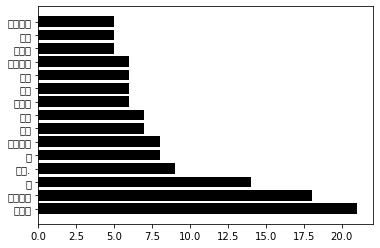

In [157]:
#-*- coding: utf-8 -*- 
import matplotlib.pyplot as plt
#plt.rc('font', family = 'NanumMyeongjo')
plt.barh(range(len(v)),v,color = "black") #bar 그래프로 그리겠다 ! x는 v의 길이
plt.yticks(range(len(v)), k) 
plt.show()

#x값 따로, y값 따로 plotting

In [158]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Myeongjo' in font.name:
        print(font.name, font.fname)